<a href="https://colab.research.google.com/github/tasosnikitakis/Data_Science_Notebooks/blob/main/Data_Visualization_with_MatplotLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [4]:
df.shape

(2482, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.count()

DATE     2482
TAG      2482
POSTS    2482
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
df.groupby("TAG").sum()

<ipython-input-6-a2cc2c872c1d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("TAG").sum()


,POSTS
TAG,
assembly,42904
c,397097
c#,1593993
c++,795050
delphi,51007
go,69577
java,1898378
javascript,2497345
perl,67686


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [7]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,179,179
c,179,179
c#,180,180
c++,179,179
delphi,179,179
go,164,164
java,179,179
javascript,179,179
perl,179,179


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [9]:
type(df['DATE'][1])

str

In [10]:
print(pd.to_datetime(df['DATE'][1]))
type(pd.to_datetime(df['DATE'][1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [11]:
df.DATE = pd.to_datetime(df.DATE)
df.head

<bound method NDFrame.head of            DATE       TAG  POSTS
0    2008-07-01        c#      3
1    2008-08-01  assembly      8
2    2008-08-01         c     83
3    2008-08-01        c#    505
4    2008-08-01       c++    164
...         ...       ...    ...
2477 2023-06-01       php   1937
2478 2023-06-01    python  11455
2479 2023-06-01         r   2685
2480 2023-06-01      ruby    228
2481 2023-06-01     swift   1145

[2482 rows x 3 columns]>

## Data Manipulation



In [12]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")

In [13]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,956.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,188.0,1309.0,4763.0,2219.0,133.0,659.0,5189.0,10449.0,79.0,2427.0,15717.0,3803.0,340.0,1296.0
2023-03-01,180.0,1265.0,4910.0,2572.0,143.0,639.0,5538.0,10541.0,95.0,2282.0,15565.0,3832.0,301.0,1367.0
2023-04-01,197.0,1190.0,3850.0,1967.0,121.0,516.0,4498.0,8317.0,56.0,1944.0,12447.0,3107.0,220.0,1098.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [14]:
reshaped_df.shape

(180, 14)

In [15]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [16]:
reshaped_df.count()

TAG
assembly      179
c             179
c#            180
c++           179
delphi        179
go            164
java          179
javascript    179
perl          179
php           179
python        179
r             177
ruby          179
swift         171
dtype: int64

In [17]:
reshaped_df.fillna(0, inplace=True)

In [18]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1641.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,956.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0


In [19]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

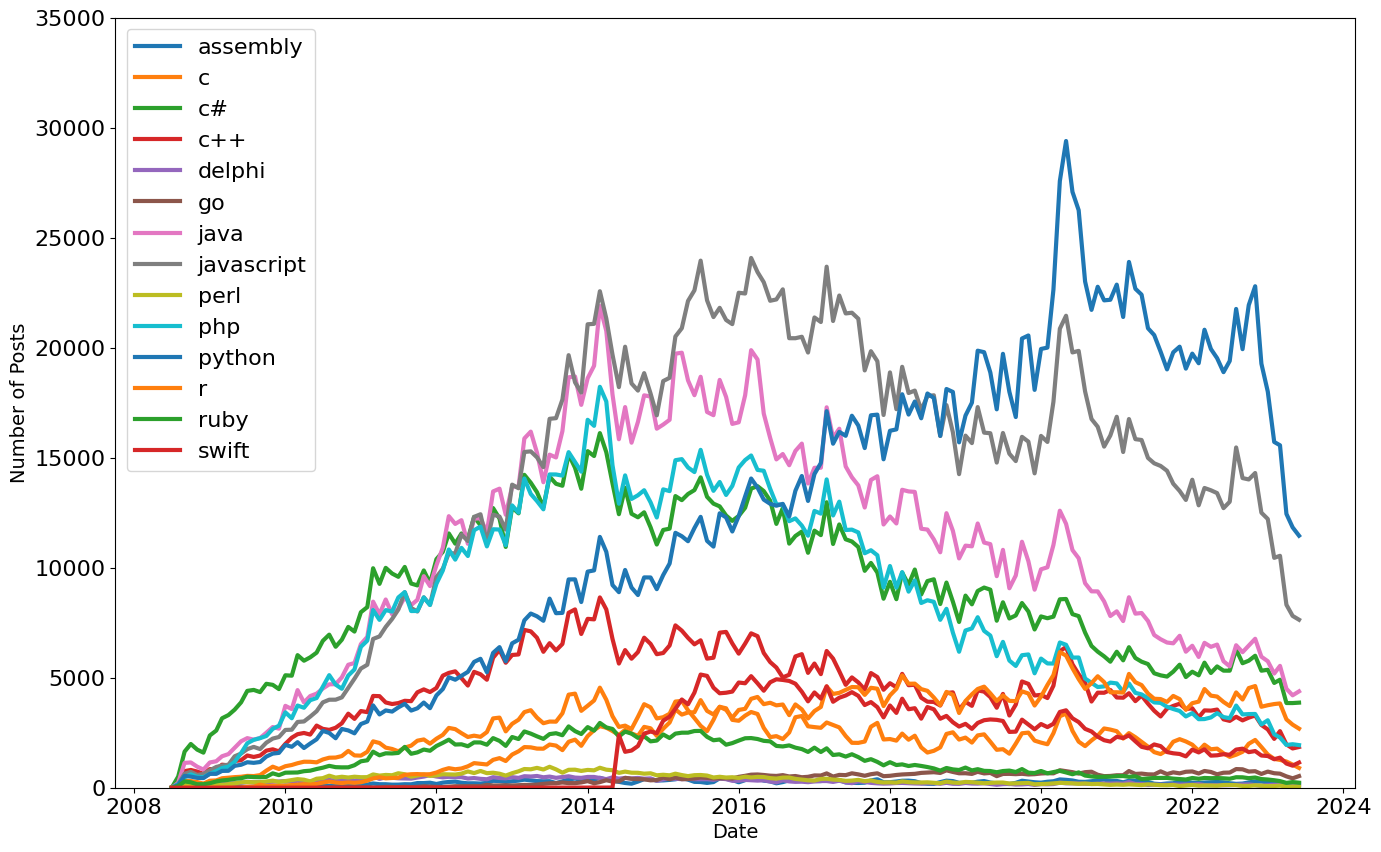

In [34]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

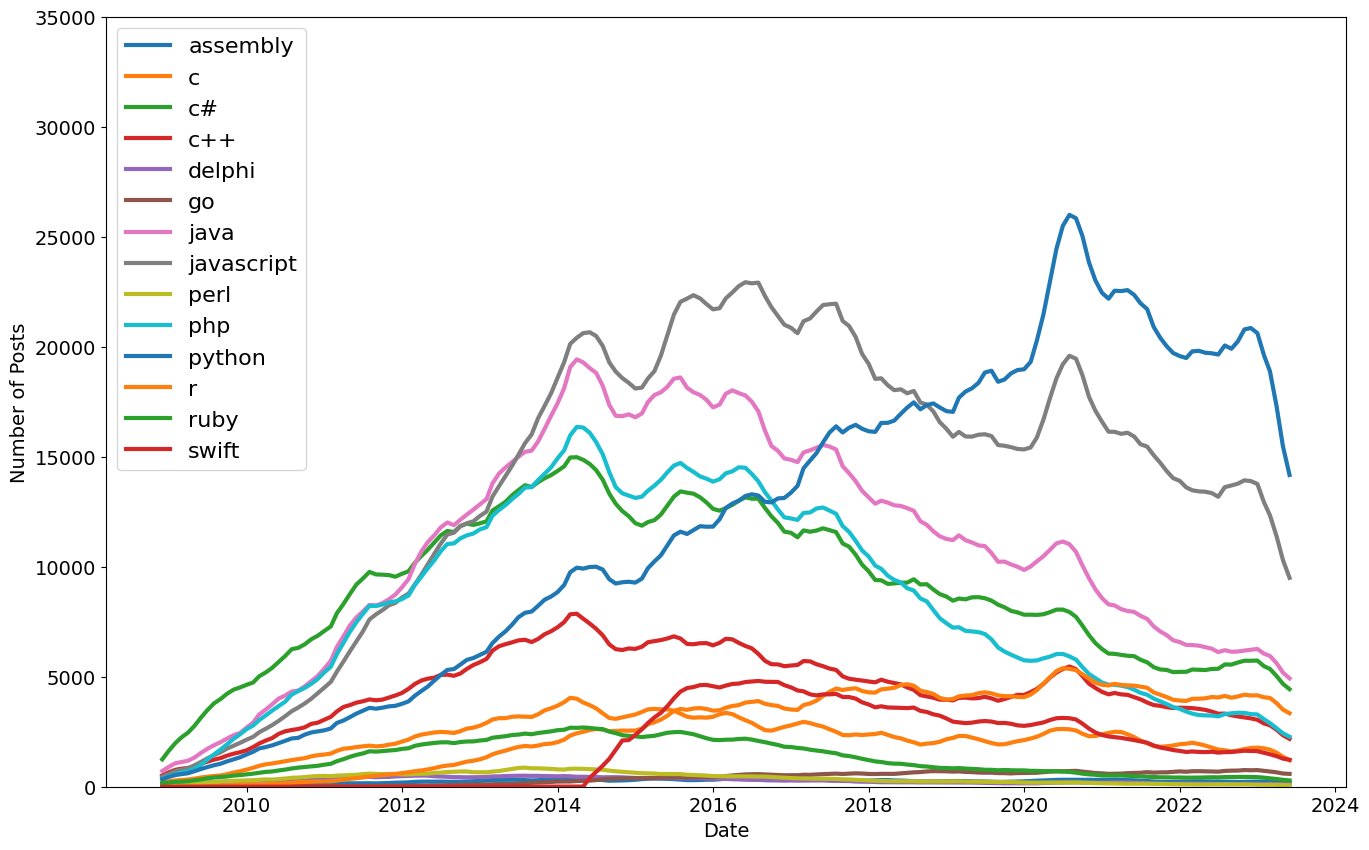

In [38]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).